Capstone Analytic Report and Research Proposal

Section 1:

Prompt: Describe your data set. Describe and explore your data set in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the data set that you will use.

My data comes from a Kaggle User, Dominik Gawlik, who has aggregated raw, as-is daily prices of the NYSE from 2010 to 2016 (dataset can be downloaded at this URL: https://www.kaggle.com/dgawlik/nyse). This report concentrates on the prices of Apple stock (AAPL). The table contains seven columns: Date, Symbol, Open, Close, Low, High, and Volume. Many useful insights can be drawn from the data, such as comparing how AAPL shares performed in comparison to the New York Stock Exchange from 2010 to 2016. To answer this question, we need to generate two subplots and compare them (see below). 

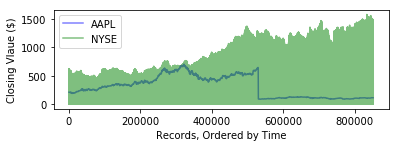

In [22]:
# Import the necessary modules
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Create a dataframe from the csv file, downloaded from Kaggle
df = pd.read_csv('C:\\Users\\maken\\prices.csv')

# Create a new dataframe from the first df, focusing on the stock symbol for Apple
AAPL = df[df['symbol'] == 'AAPL']
plt.subplot(2, 1, 2)
plt.plot(AAPL['close'], color = 'blue', alpha = .5, label = 'AAPL')
plt.ylabel('Closing Value ($)')

plt.subplot(2, 1, 2)
plt.plot(df['close'], color = 'green', alpha = .5, label = 'NYSE')
plt.ylabel('Closing Vlaue ($)')
plt.legend()

plt.xlabel('Records, Ordered by Time')

plt.show()

Notice that there is a sharp decline in AAPL stock at some set point in time. Let's ivestigate this further.

Section 2: Ask and Answer Analytic Questions

Prompt: Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Analytic Question 1: When did the sharp drop in AAPL stocks occur, and why?

Could this drop be due to a drop in the NYSE as a whole, some bad press, or could it be due to a stock splitting action?

The first thing to do is look at AAPL data as a whole - at what point in time did this sharp drop occur? By printing the dates that correspond to the values right before and right after the drop, we gain some valuable information to search upon.

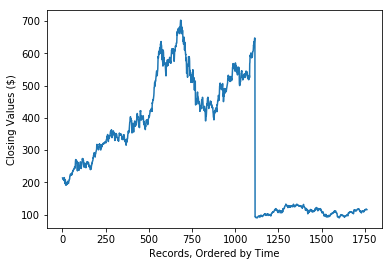

Price dropped from 645.570023 to 93.699997 between 2014-06-06 and 2014-06-09


SystemExit: 

C:\Users\maken\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [24]:
# Plot the closing values for Apple
fig, ax = plt.subplots()
plt.plot(np.arange(1,1763),AAPL['close'])
plt.ylabel('Closing Values ($)')
plt.xlabel('Records, Ordered by Time')
plt.show()

#Read the first record for the APPL stock.
prev_record = AAPL.ix[AAPL.index[0],:]
#print(prev_record)
#print(prev_record[3])

#Iterate through rows of the dataframe
for record in AAPL.iterrows():
	#Each record has two components: row number and data(date, symbol, open, close, low, high, volume).
	#First index refers to one of these two components.
	#Second index refers to the item within one of the components.
	#So to find 'close' value we first select data component (record[1])
	#and within data we select item that is indexed #3 - 'close'. Hence, record[1][3]
	if record[1][3] < (prev_record[3] - 400):
		print ("Price dropped from {} to {} between {} and {}"
		.format(prev_record[3], record[1][3], prev_record[0],record[1][0]))
		#exit after the drop is found. The "import sys" at the beginning of the script
		#is needed for this command.
		sys.exit()
	else:
		#Note that prev_record consists only of data(date, symbol, open, close, low, high, volume),
		#whereas record, as described above, has two parts:
		#row number and data(date, symbol, open, close, low, high, volume)
		#Thus, if we haven't found the drop yet, we assign our current data row (record[1])
		#to the prev_record
		prev_record = record[1]	

The data shows that the drop occurred between Friday, June 6th, and Monday, June 9th. By searching, "What happened to AAPL stock between June 6 and June 9 in 2014," a user will be brought to a CNN Money article (http://money.cnn.com/2014/06/09/investing/apple-stock-split-reactions/). The article states that there was a seven-for-one stock split that went into effect Monday, June 9th, 2014.

A stock split is an action by a company to divide its existing shares into multiple shares, while maintaining its total dollar value (source: http://www.investopedia.com/terms/s/stocksplit.asp). In AAPL's case, the company took each share, which was valued at  \$645.57, and split it into seven smaller shares, creating a new value of \$93.70/share.

Analytic Question 2: Is there a correlation in the opening price of AAPL stock and the stock price's volatility?

When AAPL opens at a higher price, is the price more likely to have a greater difference (closing price - opening price) at the end of the day? The answer to this question could provide useful insight to AAPL investors and day traders in general. One way to answer this question is to create a scatter plot.

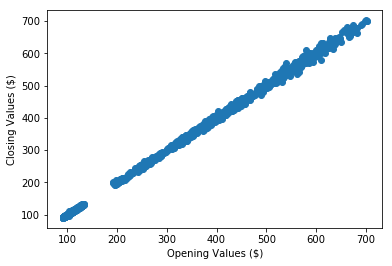

In [10]:
# Make a scatter plot of the closing values for Apple vs the opening values
plt.scatter(x=AAPL['close'],y=AAPL['open'])
plt.ylabel('Closing Values ($)')
plt.xlabel('Opening Values ($)')
plt.show()

The points in the scatter plot are distributed in a straight line with a conical shape, where the cone gets wider as the price gets higher. This trend indicates that, as the opening price gets higher, the closing price is more likely to deviate in either direction. 

####### TODO: Find an answer to below question and fix formatting.
####### WESLEY Question: Can you provide insight on this (below)?

NOTE: Even though the actual price has greater deviation in value, is the percentage close enough to where the difference is arbitrary? I.e. there is a 1% deviation at the low prices as well as the high prices even though its a \$.50 difference at the bottom and a \$5.00 difference at the top (numbers used here are made up currently).

Analytic Question 3: At what prices does AAPL most often trade? 

A histogram is a useful tool to answer this question. Histograms provide an estimate of the probability distribution of a dataset. The height of the rectangles are proportional to the relative frequency, and the width of the rectangles on the x-axis represent the price range. 

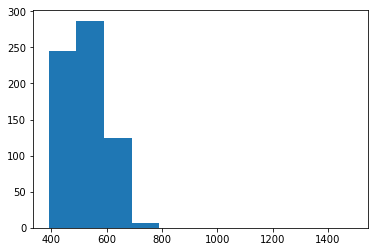

[ 245.  287.  125.    7.    0.    0.    0.    0.    0.    0.    0.]
[ 390  490  590  690  790  890  990 1090 1190 1290 1390 1490]


In [12]:
# make a histogram of the closing values for Apple
n, bins, patches = plt.hist(x=AAPL['close'], bins=np.arange(390, 1580, 100)) #Need comments to describe why I used these numbers
plt.show()
print(n)
print(bins)

By analyzing the histogram and the patch objects, it can be concluded that AAPL most often trades between \$490 and \$590 (relative frequency of 287, percentage of trades = 287 / (245 + 287 + 125) = 43.68%), with the range of \$245 to \$287 coming next (relative frequency of 245, percentage of trades = 37.29%), and about a fifth of the trades falling in the range of \$590 to \$690 (relative frequency of 125, percentage of trades = 19.02%). 

Section 3: Propose further research

Prompt: Lastly, make a proposal for a realistic future research project on this data set that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer. 

Introduction: Random walk and neural networks are used in the industry as approaches to short term stock market prediction. For neural networks, the independent approach provides a way to prevent the accumulation of error percentage versus a joint approach. A genetic algorithm is a method for solving optimization problems based on a natural selection process that mimics biological evolution (https://www.mathworks.com/discovery/genetic-algorithm.html).

Propoasl: Utilizing Random Walk and Neural Networks, can we write a program to target potential short term market movers? Conduct an analysis to compare how our model would perform through the data set as well as across industry sectors. 

Techniques:
- Data mining approaches, specifically Python and pandas, to clean the data. 
- Brownian motion model to determine which stocks have momentum.
- Machine Learning techniques, such as random forests and neural networks to improve performance, accuracy, and precision.
- Utilize the full data science toolkit to validate the model on subsets of data via cross-validation of different industry sectors. 